In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv5 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [6]:
designated_ukc_cls = 3
num_classes = 2
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=5000, designated_ukc_cls=designated_ukc_cls )
train_data, val_data, test_data = train_test

ablation set to : 5000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 4000
val_0:, 500
test_0:, 500
train_1:, 4000
val_1:, 500
test_1:, 500
4049 data in class 2 not enough to split into train:4000 and validation:500, adding the entire data as ukc
class 3 is added as ukc
ukc_3:, 500
628 data in class 4 not enough to split into train:4000 and validation:500, adding the entire data as ukc
165 data in class 5 not enough to split into train:4000 and validation:500, adding the entire data as ukc
75 data in class 6 not enough to split into train:4000 and validation:500, adding the entire data as ukc
train: 0    4000
1    4000
Name: label, dtype: int64
val: 0    500
1    500
Name: label, dtype: int64
test: 0    500
1    500
3    500
Name: label, dtype: int64
[[1. 0.]
 [1. 0.]]
some example of labels:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0.]
 [1. 0.]]

In [7]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=num_classes)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
250/250 [==============================] - 24s 95ms/step - loss: 0.0283 - accuracy: 0.9877 - precision_1: 0.9877 - recall_1: 0.9877 - val_loss: 4.3277e-05 - val_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 2/7
250/250 [==============================] - 24s 94ms/step - loss: 0.0016 - accuracy: 0.9998 - precision_1: 0.9998 - recall_1: 0.9998 - val_loss: 3.3386e-04 - val_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 3/7
250/250 [==============================] - 24s 95ms/step - loss: 3.4783e-05 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 1.8576e-05 - val_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 4/7
250/250 [==============================] - 24s 95ms/step - loss: 7.1474e-06 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 1.1754e-05 - val_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 5/7
250/250 [==========

In [ ]:
# training and recalculating the centroids in each epoch

250/250 [==============================] - 23s 93ms/step - loss: 9.0677e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.43it/s]


epoch: 1/50, train_loss: 2.805375814437866, eval_score: 0.49981205436786674
250/250 [==============================] - 23s 91ms/step - loss: 7.5054e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.47it/s]


epoch: 2/50, train_loss: 2.847421884536743, eval_score: 0.9541723766548731
250/250 [==============================] - 23s 91ms/step - loss: 6.2762e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.46it/s]


epoch: 3/50, train_loss: 2.8882241249084473, eval_score: 0.9542974079126875
250/250 [==============================] - 23s 94ms/step - loss: 5.2369e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s]


epoch: 4/50, train_loss: 2.9280734062194824, eval_score: 0.4442900805779383
250/250 [==============================] - 23s 91ms/step - loss: 4.4299e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.45it/s]


epoch: 5/50, train_loss: 2.9670627117156982, eval_score: 0.9543718455872323
250/250 [==============================] - 23s 91ms/step - loss: 3.7290e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.49it/s]


epoch: 6/50, train_loss: 3.0040221214294434, eval_score: 0.0
250/250 [==============================] - 22s 89ms/step - loss: 3.2544e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.28it/s]


epoch: 7/50, train_loss: 3.041055679321289, eval_score: 0.9543718455872323
250/250 [==============================] - 23s 91ms/step - loss: 2.7358e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.37it/s]


epoch: 8/50, train_loss: 3.0777804851531982, eval_score: 0.9543718455872323


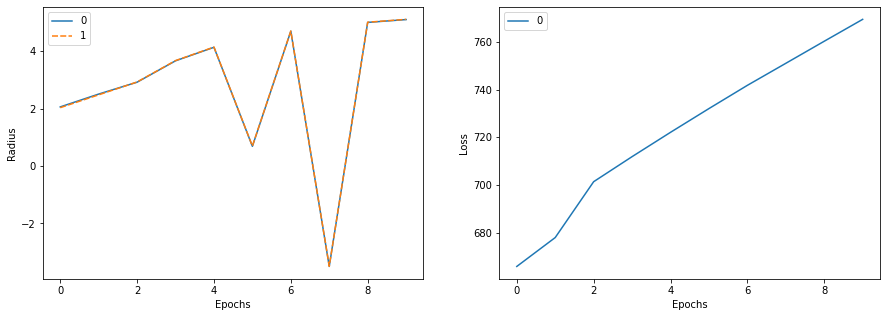

In [9]:
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=1.2, wait_patient=3,)

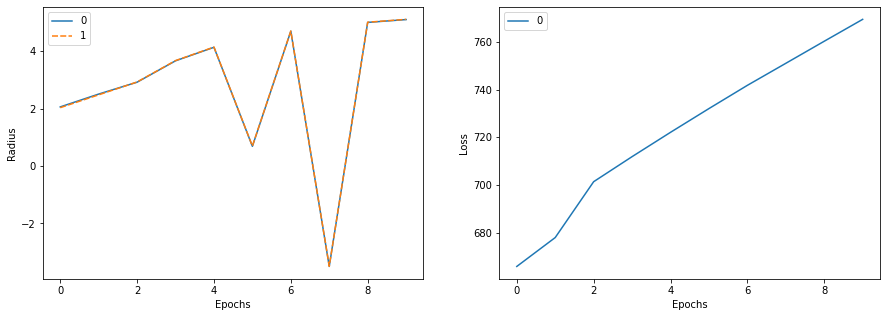

euc_dis: tf.Tensor(
[0.35673794 5.1685743  2.120899   5.1685743  0.33178812 0.43360168
 0.4262934  5.1685743  0.35878596 5.1685743  2.120899   5.1685743
 0.43429223 0.3895806  5.1685743  0.42795527 5.1685743  5.1685743
 0.4055573  5.1685743  5.1685743  5.1685743  0.49839053 2.120899
 2.3108385  5.1685743  0.45739225 0.38522682 2.120899   0.41093934
 0.45676002 2.120899  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[4.6911683 4.698691  4.6911683 4.698691  4.6911683 4.6911683 4.6911683
 4.698691  4.6911683 4.698691  4.6911683 4.698691  4.6911683 4.6911683
 4.698691  4.6911683 4.698691  4.698691  4.6911683 4.698691  4.698691
 4.698691  4.6911683 4.6911683 4.6911683 4.698691  4.6911683 4.6911683
 4.6911683 4.6911683 4.6911683 4.6911683], shape=(32,), dtype=float32)
predictions with ukc_label=999 [  0 999   0 999   0   0   0 999   0 999   0 999   0   0 999   0 999 999
   0 999 999 999   0   0   0 999   0   0   0   0   0   0]
[[4000    0    0]
 [   0    1 3999]
 [   0    0    0]]
5

In [14]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

In [18]:
designated_ukc_cls = 4
num_classes = 3
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=4000, designated_ukc_cls=designated_ukc_cls )
train_data, val_data, test_data = train_test

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 3200
val_0:, 400
test_0:, 400
train_1:, 3200
val_1:, 400
test_1:, 400
train_2:, 3200
val_2:, 400
test_2:, 400
902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as ukc
class 4 is added as ukc
ukc_4:, 400
165 data in class 5 not enough to split into train:3200 and validation:400, adding the entire data as ukc
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as ukc
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    400
4    400
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset elemen

In [19]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=num_classes)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
300/300 [==============================] - 30s 99ms/step - loss: 0.0544 - accuracy: 0.9841 - precision_3: 0.9884 - recall_3: 0.9736 - val_loss: 0.0011 - val_accuracy: 1.0000 - val_precision_3: 1.0000 - val_recall_3: 1.0000
Epoch 2/7
300/300 [==============================] - 29s 96ms/step - loss: 0.0019 - accuracy: 0.9993 - precision_3: 0.9993 - recall_3: 0.9993 - val_loss: 0.0191 - val_accuracy: 0.9924 - val_precision_3: 0.9924 - val_recall_3: 0.9924
Epoch 3/7
300/300 [==============================] - 28s 94ms/step - loss: 0.0012 - accuracy: 0.9995 - precision_3: 0.9995 - recall_3: 0.9995 - val_loss: 0.0143 - val_accuracy: 0.9932 - val_precision_3: 0.9932 - val_recall_3: 0.9932
Epoch 4/7
300/300 [==============================] - 28s 95ms/step - loss: 9.9363e-04 - accuracy: 0.9997 - precision_3: 0.9997 - recall_3: 0.9997 - val_loss: 6.0417e-06 - val_accuracy: 1.0000 - val_precision_3: 1.0000 - val_recall_3: 1.0000
Epoch 5/7
300/300 [==========================

300/300 [==============================] - 28s 93ms/step - loss: 1.0322e-06 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.41it/s]


epoch: 1/50, train_loss: 3.463135242462158, eval_score: 0.61237734325894
300/300 [==============================] - 28s 92ms/step - loss: 8.1425e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.42it/s]


epoch: 2/50, train_loss: 3.473168134689331, eval_score: 0.6217978245546766
300/300 [==============================] - 27s 91ms/step - loss: 6.6314e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.36it/s]


epoch: 3/50, train_loss: 3.482637643814087, eval_score: 0.6298967701056244
300/300 [==============================] - 27s 91ms/step - loss: 5.4591e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.41it/s]


epoch: 4/50, train_loss: 3.4914004802703857, eval_score: 0.6321931757262701
300/300 [==============================] - 28s 93ms/step - loss: 4.4871e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.27it/s]


epoch: 5/50, train_loss: 3.501403331756592, eval_score: 0.6332923535517029
300/300 [==============================] - 27s 91ms/step - loss: 3.7214e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.34it/s]


epoch: 6/50, train_loss: 3.512045383453369, eval_score: 0.6338985452752158
300/300 [==============================] - 27s 92ms/step - loss: 3.1670e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.39it/s]


epoch: 7/50, train_loss: 3.522318124771118, eval_score: 0.6342635988287917
300/300 [==============================] - 27s 91ms/step - loss: 2.6976e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.39it/s]


epoch: 8/50, train_loss: 3.5328030586242676, eval_score: 0.634440865813076
300/300 [==============================] - 27s 91ms/step - loss: 2.3223e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.18it/s]


epoch: 9/50, train_loss: 3.543842077255249, eval_score: 0.6344931859538042
300/300 [==============================] - 28s 94ms/step - loss: 1.9935e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.32it/s]


epoch: 10/50, train_loss: 3.5548160076141357, eval_score: 0.6345556191247039
300/300 [==============================] - 27s 91ms/step - loss: 1.7174e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.34it/s]


epoch: 11/50, train_loss: 3.566349744796753, eval_score: 0.6345556191247039
300/300 [==============================] - 27s 91ms/step - loss: 1.4814e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.34it/s]


epoch: 12/50, train_loss: 3.5783703327178955, eval_score: 0.6345556191247039
300/300 [==============================] - 28s 93ms/step - loss: 1.2706e-07 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.40it/s]


epoch: 13/50, train_loss: 3.5906295776367188, eval_score: 0.6345556191247039


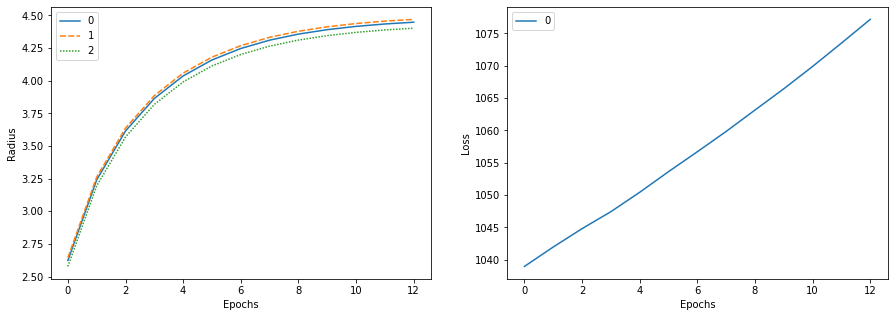

In [20]:
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=1.2, wait_patient=3,)

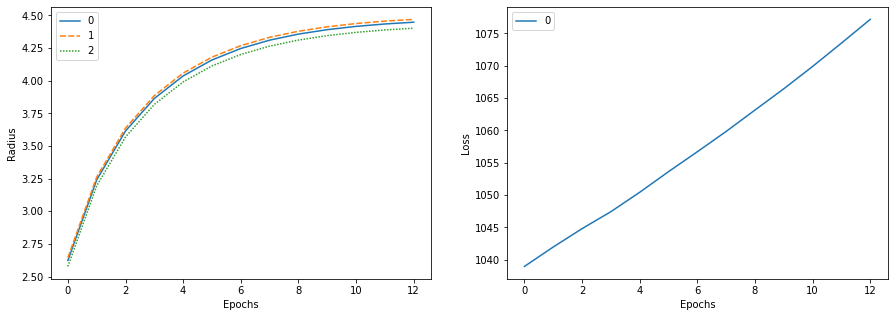

euc_dis: tf.Tensor(
[ 6.260281   23.740747   24.214142    6.260281    6.260281    1.0361819
  5.7993965   1.9028238   1.9028238   6.260281    6.260281    0.774449
  0.8694738   0.90532386  0.7930237   6.0504603   6.305563    1.9028238
  1.9028238   0.9153582   3.8860734   0.287224   24.768717   24.263123
  6.8712473   0.9200105   6.3551884   6.260281    6.260281    6.586799
 18.451742   24.768717  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[4.412113  4.412113  4.3902836 4.412113  4.412113  4.3902836 4.3445964
 4.3445964 4.3445964 4.412113  4.412113  4.3902836 4.3902836 4.3902836
 4.3902836 4.3445964 4.3445964 4.3445964 4.3445964 4.3902836 4.3445964
 4.3902836 4.412113  4.3902836 4.3445964 4.3902836 4.3445964 4.412113
 4.412113  4.3445964 4.412113  4.412113 ], shape=(32,), dtype=float32)
predictions with ukc_label=999 [999 999 999 999 999   0 999   2   2 999 999   0   0   0   0 999 999   2
   2   0   2   0 999 999 999   0 999 999 999 999 999 999]
[[3187    0    0   13]
 [   

In [21]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

In [23]:
oset.centroids

<tf.Tensor: shape=(3, 16), dtype=float32, numpy=
array([[1.6480005e-01, 6.5401185e-01, 4.2558117e+00, 0.0000000e+00,
        3.1159692e-02, 4.7094679e+00, 2.1656542e+00, 9.0933628e+00,
        0.0000000e+00, 1.0155720e+01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.0182667e+00, 4.9619322e+00, 8.4934921e+00],
       [1.9945066e+01, 0.0000000e+00, 0.0000000e+00, 5.0542434e-03,
        3.3992950e+01, 0.0000000e+00, 1.1731508e-03, 0.0000000e+00,
        6.7607478e-05, 0.0000000e+00, 7.9185920e+00, 2.6701475e+01,
        0.0000000e+00, 1.4349547e+01, 0.0000000e+00, 2.2452852e+01],
       [6.3493011e-05, 1.7763498e-03, 6.1079645e-01, 0.0000000e+00,
        1.0997711e+01, 0.0000000e+00, 0.0000000e+00, 4.4048972e+00,
        1.3347363e+01, 3.5143181e-04, 0.0000000e+00, 5.7002977e-02,
        4.5891743e+00, 7.1293004e-03, 9.7752438e+00, 0.0000000e+00]],
      dtype=float32)>

In [ ]:
# training and recalculating the centroid in each epochs is increasing the loss continuously